In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.signal import butter, lfilter, freqz

In [5]:
fil = pd.read_csv('hometoschool_gyr.csv')
fil.head()

,time,X_value,Y_value,Z_value
0,0.000,0.00000,0.00000,0.00000
1,0.001,-0.00131,-0.28813,0.03593
2,0.046,0.05121,0.17612,0.10190
3,0.102,0.00601,-0.04134,0.04938
4,0.162,0.01089,-0.01692,0.01395


In [6]:
# We will add two more cols to represent when the device was moving(move) and normalization(norm)
# Since our movement is from the start we will set it to 1 for true.
fil['move'] = 1
fil['norm'] = 0

In [10]:
# Renaming 
fil.columns = ['time', 'x', 'y', 'z','move','norm']

In [12]:
# This will normalize the data
fil['norm'] = np.sqrt(fil['x']**2 + fil['y']**2 + fil['z']**2)
fil.head()

,time,x,y,z,move,norm
0,0.000,0.00000,0.00000,0.00000,1,0.000000
1,0.001,-0.00131,-0.28813,0.03593,1,0.290365
2,0.046,0.05121,0.17612,0.10190,1,0.209820
3,0.102,0.00601,-0.04134,0.04938,1,0.064680
4,0.162,0.01089,-0.01692,0.01395,1,0.024484


In [14]:
# Make sure our device was in motion for the whole duration.
fil['move'].value_counts()/float(len(data))

1    1.0
Name: move, dtype: float64

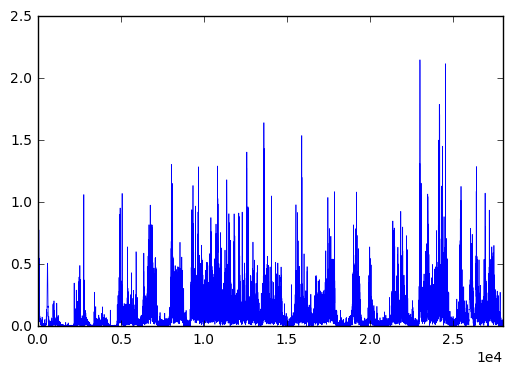

In [16]:
# This is to show the plotting of the normalization of the data on all three axis
plt.plot(fil[fil['move'] == 1]['norm'], linewidth=.5)
plt.xlim(0, len(fil))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))